# 1. 데이터 수집 및 불러오기

# 2. 포스터 데이터 수집

In [2]:
#원본 데이터 csv 파일 불러오기
import pandas as pd
df = pd.read_csv('test.csv')
df.head()

,이름,적합사이즈,나이,출장수,키,몸무게
0,조현우,275,27,12,189,75
1,김영권,285,29,69,186,81
2,김민재,290,22,19,190,88
3,이청용,265,30,89,180,70
4,손흥민,260,26,79,183,77
5,이재성,275,26,43,180,70
6,백승호,280,22,0,180,68
7,이강인,270,18,0,173,63
8,이승우,260,21,10,170,63
9,황의조,275,26,25,184,73


## 0) 포스터 이름 불러오기

In [82]:
import os

path = "image/"
poster_list = os.listdir(path)

print ("poster_list: {}".format(poster_list))

poster_list: ['19820019.jpg', '20030371.jpg', '20030410.jpg', '20030433.jpg', '20040481.jpg', '20040483.jpg', '20040487.jpg', '20040488.jpg', '20040490.jpg', '20040491.jpg', '20040525.jpg', '20040554.jpg', '20040555.jpg', '20040567.jpg', '20040568.jpg', '20040571.jpg', '20040573.jpg', '20040576.jpg', '20040580.jpg', '20040583.jpg', '20040585.jpg', '20040593.jpg', '20040595.jpg', '20040596.jpg', '20040597.jpg', '20040598.jpg', '20040612.jpg', '20040613.jpg', '20040617.jpg', '20040619.jpg', '20040624.jpg', '20040628.jpg', '20040631.jpg', '20040640.jpg', '20040641.jpg', '20040649.jpg', '20040651.jpg', '20040655.jpg', '20040657.jpg', '20040659.jpg', '20040671.jpg', '20040673.jpg', '20040682.jpg', '20040695.jpg', '20040700.jpg', '20040706.jpg', '20040717.jpg', '20040721.jpg', '20040743.jpg', '20040744.jpg', '20040745.jpg', '20040755.jpg', '20040756.jpg', '20040774.jpg', '20040776.jpg', '20040778.jpg', '20040785.jpg', '20040786.jpg', '20050007.jpg', '20050008.jpg', '20050010.jpg', '20050011.

## 1) 크기 맞추기

In [ ]:
#861*600으로 맞춰져 있음
from PIL import Image

#image = Image.open(path+'/1.jpg')
#resize_image = image.resize((512,512))
#resize_image.save('./2.jpg')

## 2) 얼굴 추출하기

In [1]:
import cv2
import numpy as np

In [3]:
#포스터 관련 데이터 추가 열
df["포스터_사람 수"] = 0   #0으로 초기화
df["포스터_사람 크기"] = 0   #0으로 초기화
df

,이름,적합사이즈,나이,출장수,키,몸무게,포스터_사람 수,포스터_사람 크기
0,조현우,275,27,12,189,75,0,0
1,김영권,285,29,69,186,81,0,0
2,김민재,290,22,19,190,88,0,0
3,이청용,265,30,89,180,70,0,0
4,손흥민,260,26,79,183,77,0,0
5,이재성,275,26,43,180,70,0,0
6,백승호,280,22,0,180,68,0,0
7,이강인,270,18,0,173,63,0,0
8,이승우,260,21,10,170,63,0,0
9,황의조,275,26,25,184,73,0,0


In [33]:
#얼굴 인식용 xml 파일
faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

for i in range(1,4):
    img_num = '00'+str(i)+'.jpg'
    image = cv2.imread('TestImage/'+img_num) #얼굴을 찾을 이미지 불러오기
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #흑백처리
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.032,minNeighbors=8,minSize=(30, 30) ) #얼굴찾기

    print ("Face Count : {0}".format(len(faces))) #찾은 사람 수 출력
    
    size = ""
    #이미지에 찾은 얼굴 위 사각형 출력하기
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        size = size + "," + str(x)+'*'+str(y) #여러명의 사이즈 합치기
        print(x, y , w, h)

    size = size[1:] #앞의 콤마 제거
    
    #사람수가 0명이면 사이즈도 0으로 기재
    if(len(faces) == 0):
        size = str(0)
        
    df.loc[i-1,["포스터_사람 수"]] = len(faces)
    df.loc[i-1,["포스터_사람 크기"]] = size

    #화면에 출력해주기
    cv2.imshow("Face", image) #테스트용으로 주석처리
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
    cv2.waitKey(1)

Face Count : 2
96 342 34 34
309 398 63 63
Face Count : 1
227 105 323 323
Face Count : 4
123 247 38 38
334 249 62 62
244 213 62 62
209 358 66 66


In [10]:
df

,이름,적합사이즈,나이,출장수,키,몸무게,포스터_사람 수,포스터_사람 크기
0,조현우,275,27,12,189,75,26,"1888*2158,1846*1452,728*2231,867*2310,1836*163..."
1,김영권,285,29,69,186,81,5,"837*47,1222*2140,1562*2330,722*339,598*1941"
2,김민재,290,22,19,190,88,9,"1339*2086,393*800,797*706,1073*804,1741*1862,1..."
3,이청용,265,30,89,180,70,3,"251*193,885*116,300*964"
4,손흥민,260,26,79,183,77,11,"37*1116,1074*1037,125*1120,577*747,684*1235,55..."
5,이재성,275,26,43,180,70,0,0
6,백승호,280,22,0,180,68,0,0
7,이강인,270,18,0,173,63,0,0
8,이승우,260,21,10,170,63,0,0
9,황의조,275,26,25,184,73,0,0


In [35]:
#얼굴 인식용 xml 파일
faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

for i in range(1,10):
    img_num = str(i)+'.png'
    image = cv2.imread('TestImage/'+img_num) #얼굴을 찾을 이미지 불러오기
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #흑백처리
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.032,minNeighbors=8,minSize=(30, 30) ) #얼굴찾기

    print ("Face Count : {0}".format(len(faces))) #찾은 사람 수 출력
    
    size = ""
    #이미지에 찾은 얼굴 위 사각형 출력하기
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        size = size + "," + str(x)+'*'+str(y) #여러명의 사이즈 합치기
        print(x, y , w, h)

    size = size[1:] #앞의 콤마 제거
    
    #사람수가 0명이면 사이즈도 0으로 기재
    if(len(faces) == 0):
        size = str(0)
        
    df.loc[i-1,["포스터_사람 수"]] = len(faces)
    df.loc[i-1,["포스터_사람 크기"]] = size

    #화면에 출력해주기
    cv2.imshow("Face", image) #테스트용으로 주석처리
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
    cv2.waitKey(1)

Face Count : 4
43 40 40 40
4 108 43 43
132 132 47 47
73 67 55 55
Face Count : 1
114 77 55 55
Face Count : 0
Face Count : 0
Face Count : 0
Face Count : 1
69 5 56 56
Face Count : 1
48 51 94 94
Face Count : 1
76 27 61 61
Face Count : 0


## 3) 글씨 추출하기

In [12]:
import cv2
import numpy as np
large = cv2.imread('image/20030371.jpg')
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)
_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mask = np.zeros(bw.shape, dtype=np.uint8)
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
# show image with contours rect
cv2.imshow('rects', rgb)
cv2.waitKey()

-1

## 4) 색상 추출하기
k-means clustering algorithm 이용

In [13]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [38]:
image = cv2.imread("image/20050045.jpg")
# opencv로 이미지를 읽어들이면 RGB순서가 아닌 BGR값으로 리턴
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

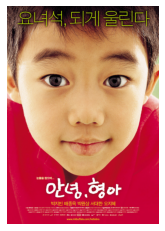

In [39]:
plt.figure()
plt.axis("off")
plt.imshow(image)

In [40]:
print(image.shape)

(861, 600, 3)


In [41]:
image = image.reshape((image.shape[0] * image.shape[1], 3)) # height, width 통합
print(image.shape)

(516600, 3)


In [42]:
k = 5 # 5개로 나누겠습니다
clt = KMeans(n_clusters = k)
clt.fit(image)

KMeans(n_clusters=5)

In [43]:
for center in clt.cluster_centers_:
    print(center)

[165.67777    105.15771713  69.66363424]
[195.2476311    4.39675831  50.04872585]
[56.09431913 27.16675021 27.89909774]
[241.25253537 220.9392038  192.2329906 ]
[215.49852445 166.94349046 110.32283521]


In [44]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


hist = centroid_histogram(clt)
print(hist)

[0.12411537 0.32746225 0.11554201 0.11006388 0.32281649]


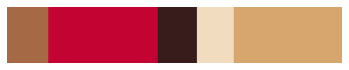

In [45]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar


bar = plot_colors(hist, clt.cluster_centers_)


# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [ ]:
var_R = ( R / 255 )
var_G = ( G / 255 )
var_B = ( B / 255 )

var_Min = min( var_R, var_G, var_B )    //Min. value of RGB
var_Max = max( var_R, var_G, var_B )    //Max. value of RGB
del_Max = var_Max - var_Min             //Delta RGB value

V = var_Max

if ( del_Max == 0 )                     //This is a gray, no chroma...
{
    H = 0
    S = 0
}
else                                    //Chromatic data...
{
   S = del_Max / var_Max

   del_R = ( ( ( var_Max - var_R ) / 6 ) + ( del_Max / 2 ) ) / del_Max
   del_G = ( ( ( var_Max - var_G ) / 6 ) + ( del_Max / 2 ) ) / del_Max
   del_B = ( ( ( var_Max - var_B ) / 6 ) + ( del_Max / 2 ) ) / del_Max

   if      ( var_R == var_Max ) H = del_B - del_G
   else if ( var_G == var_Max ) H = ( 1 / 3 ) + del_R - del_B
   else if ( var_B == var_Max ) H = ( 2 / 3 ) + del_G - del_R

    if ( H < 0 ) H += 1
    if ( H > 1 ) H -= 1
}